#Exploratory Data Analysis - Retail
#TASK-4
#DONEBY:PRIYANKA KUMARI


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset from local directory

In [4]:
from google.colab import files
uploaded=files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


Load Dataset

In [5]:
dataset=pd.read_csv('SampleSuperstore.csv')

Summarize Dataset

In [6]:
print(dataset.shape)
print(dataset.head(5))

(9994, 13)
        Ship Mode    Segment        Country  ... Quantity Discount    Profit
0    Second Class   Consumer  United States  ...        2     0.00   41.9136
1    Second Class   Consumer  United States  ...        3     0.00  219.5820
2    Second Class  Corporate  United States  ...        2     0.00    6.8714
3  Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4  Standard Class   Consumer  United States  ...        2     0.20    2.5164

[5 rows x 13 columns]


In [7]:
dataset.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
#number of unique values in each column
for i in dataset.columns:
  print(i,len(dataset[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [10]:
#check for null values
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Observation:

There is no null value in dataset

In [11]:
#checking the data types
dataset.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

from this we get to know that all the datatypes are correct and no changes is required

In [12]:
dataset.describe() #function only for continuous variables

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Observations:
1.There is no missing value in the data set


2.In the sales and profit the value between 75% and max is quite high which indicates the presence of outlier .
3. The mean of discount is very low .

In [13]:
#as the describe function is only for continous variables,we will check for categorical values also
dataset.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


Observation

1.There are 4 types of shipping mode given in the dataset

2.We will examine 3 segments of people and the dataset is for 531 cities of a country


#Univariate Analysis

In [14]:
#Analysis the segments of people buying from supermart
dataset['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [15]:
dataset['Segment'].value_counts()/len(dataset['Segment'])*100 # by just value_counts we dont get exact percentage of the three segments of people
#so divided by len(dataset['Segment]) and multiply by 100 to get different percentagesof 3 segments buying from the supermart.

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

Observation

1.51.941% are consumers,30.21% belongs to corporate and 17.840% are from home office 

#Barplot Between Different Segments of People

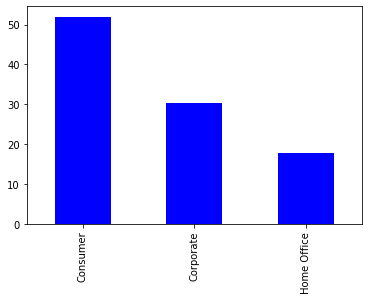

In [16]:
Seg=(dataset['Segment'].value_counts()/len(dataset['Segment'])*100).plot(kind='bar',color='blue')

Observation:

50% of people belong to consumer class.

 20-30% of people belong to Corporate and Home Office Class

In [17]:
#Analysing Ship Mode for the data
K=dataset['Ship Mode'].value_counts()/len(dataset['Ship Mode'])*100
K


Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

#Barplot between the 4 different Ship mode

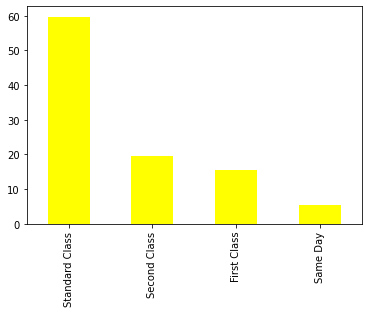

In [18]:
K.plot(kind='bar',color='yellow')

Observation:

60% of the deliveries belong to Standard class

Very less (<10%) deliveries are made on the same day

In [19]:
#Analysing the category of items in the supermart
I=dataset['Category'].value_counts()/len(dataset['Category'])*100
I


Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: Category, dtype: float64

#Barplot between  different Categories of Items

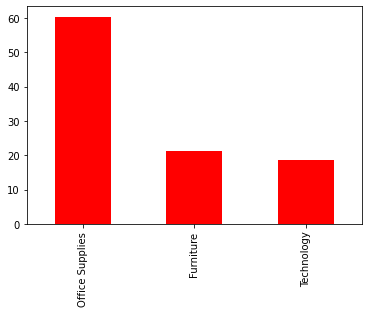

In [20]:
I.plot(kind='bar',color='red')

Observations:

Most of the items belong to Office Supplies in the SuperMart

15-20% of the items are furtinure and Technology related items in the supermart

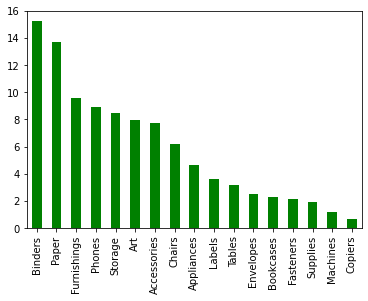

In [21]:
#Analysing the subcategories of items present in the supermart
((dataset['Sub-Category'].value_counts())/len(dataset['Sub-Category'])*100).plot(kind='bar',color='green')

Pairplot

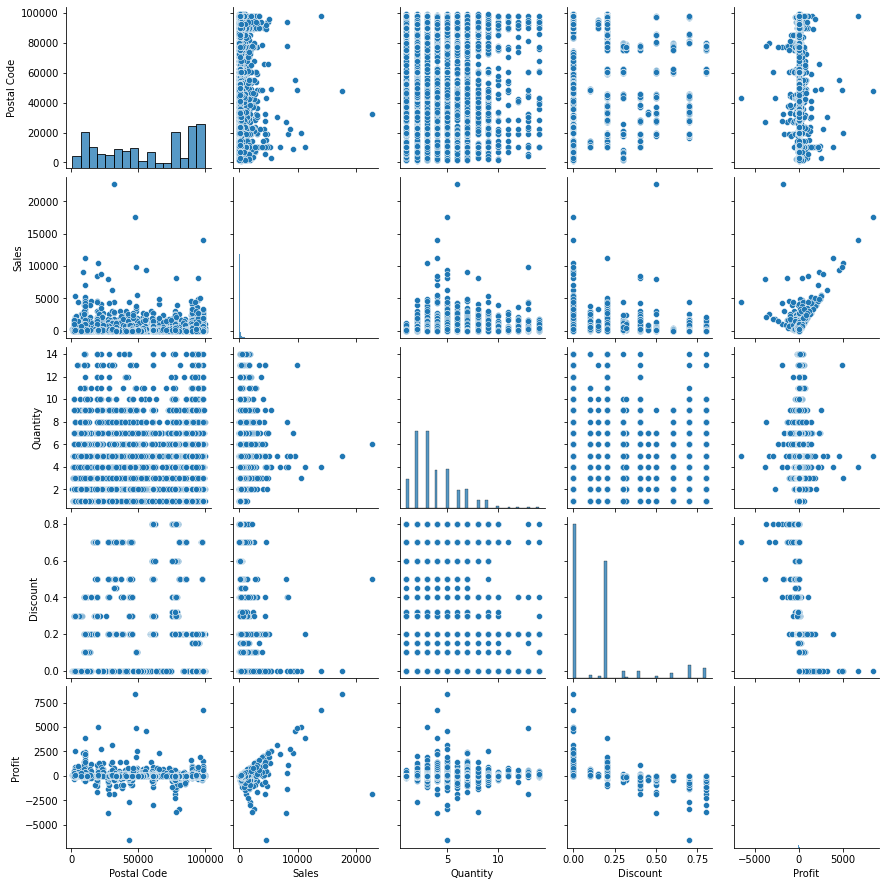

In [22]:
sns.pairplot(dataset)

#Bivariate Analysis

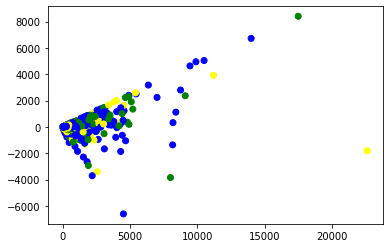

In [23]:
#scatter plot
fig,ax=plt.subplots()
colors={'Consumer':'blue','Corporate':'green','Home Office':'yellow'}
ax.scatter(dataset['Sales'],dataset['Profit'],c=dataset['Segment'].apply(lambda x:colors[x]))
plt.show()

Observation:
as evident from the plot, as the blue color cover the most area and it stands for Consumer,so We can say that there is more profit in the consumer segment.

#Pivot Table

In [24]:
dataset.pivot_table(values='Sales',index='Segment',columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


#Pivot Table for Profit and loss Analysis

In [25]:
dataset.pivot_table(values='Profit',index='Segment',columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


Observation:

for discount more than 30%,the supermarket is facing loss

for the items having discount between 0 to 20%,the sales of the superstore is preety good and gaining a decent profit

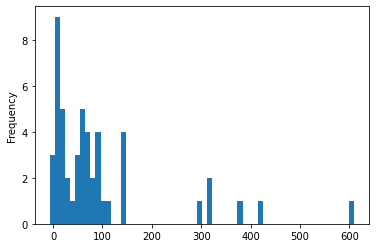

In [26]:
temp_dataset=dataset.loc[(dataset['Segment']=='Consumer')&(dataset['Discount']==0.1)]
temp_dataset['Profit'].plot.hist(bins=60)

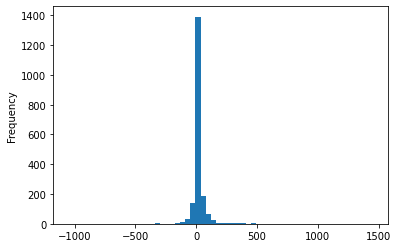

In [27]:
temp_dataset=dataset.loc[(dataset['Segment']=='Consumer')&(dataset['Discount']==0.2)]
temp_dataset['Profit'].plot.hist(bins=60)

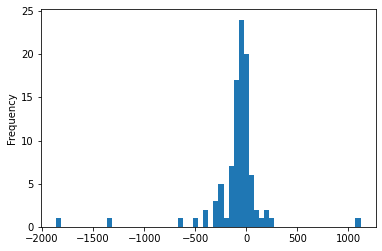

In [28]:
temp_dataset=dataset.loc[(dataset['Segment']=='Consumer')&(dataset['Discount']==0.4)]
temp_dataset['Profit'].plot.hist(bins=60)

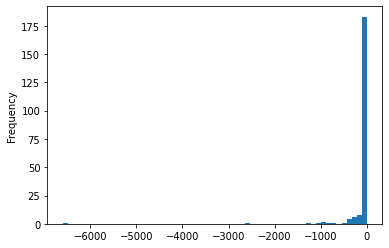

In [29]:
temp_dataset=dataset.loc[(dataset['Segment']=='Consumer')&(dataset['Discount']==0.7)]
temp_dataset['Profit'].plot.hist(bins=60)

Observation:

For consumer segment when the superstore is offering discount less than 40%,its going to earn Profit

And if the discount>50% on the items the superstore is going through loss as depicted from the plot

#Plot Showing the exact Scenario of all the Segments when following Discount was offered by superstore

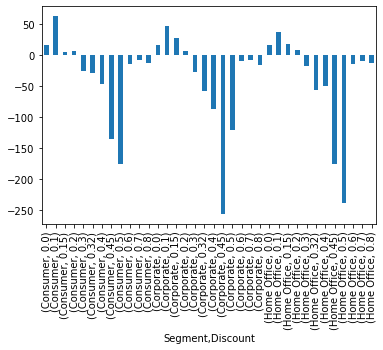

In [30]:
temp=dataset.groupby(['Segment','Discount']).Profit.median()
temp.plot(kind='bar',stacked=True)

#Heatmap to Visualize Correlation between Columns

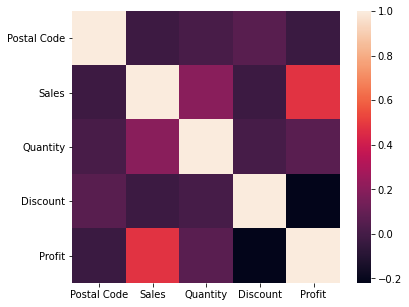

In [31]:
fig,axes=plt.subplots(1,1,figsize=(6,5))
sns.heatmap(dataset.corr())
plt.show()

Obsevation:

Here the lightest colour shows the perfect positive correlation and the darkest shows that there is no correlation

#Plot between Profit and Sales,Grouped them by Sub Categories

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


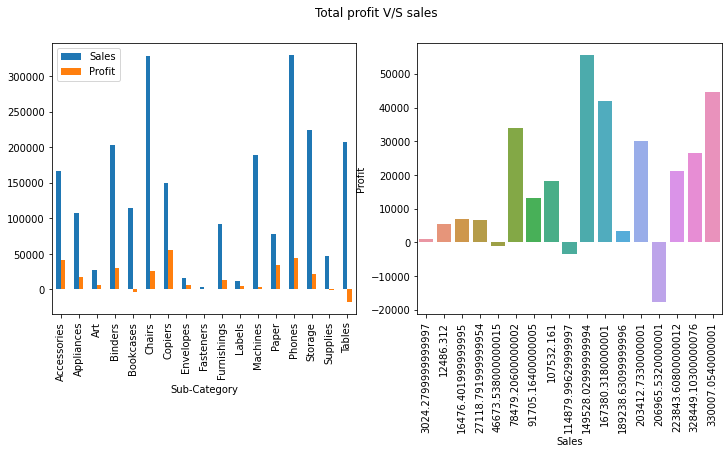

In [32]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
fig.suptitle("Total profit V/S sales")
sns.barplot(data=dataset.groupby("Sub-Category")['Sales','Profit'].agg(sum),x='Sales',y='Profit',ax=axes[1])
dataset.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


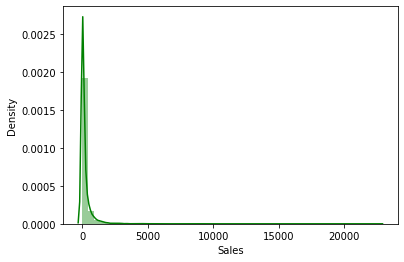

In [33]:
sns.distplot(dataset['Sales'],color='g')

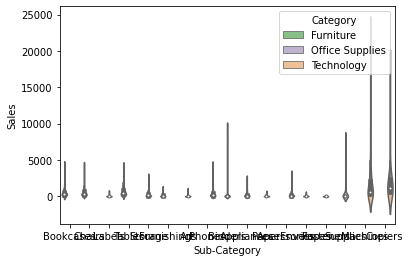

In [34]:
sns.violinplot(x='Sub-Category',y='Sales',data=dataset,hue='Category',palette='Accent')

Joint Plot between Quantity and Profit

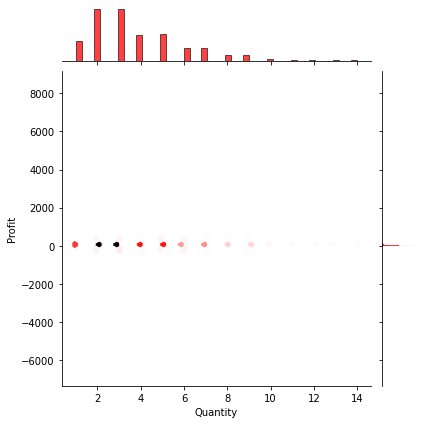

In [37]:
sns.jointplot(x='Quantity',y='Profit',data=dataset,kind='hex',color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


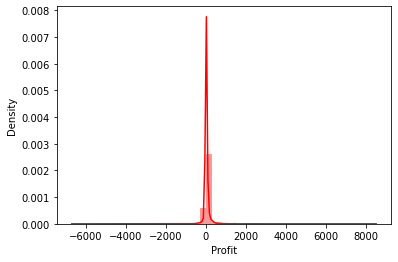

In [41]:
sns.distplot(dataset['Profit'],color='r')



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


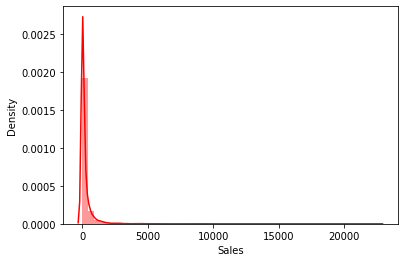

In [42]:
sns.distplot(dataset['Sales'],color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


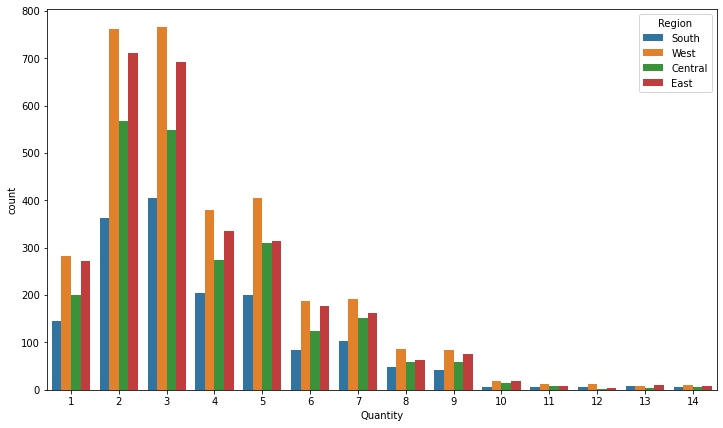

In [49]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
sns.countplot(dataset['Quantity'],hue=dataset['Region'])
plt.show()

In [ ]:
sns.boxplot('Category','Profit',data=dataset,palette='magma')

Bar Plot and Line Plot Showing Sales with different Modes and Segments

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

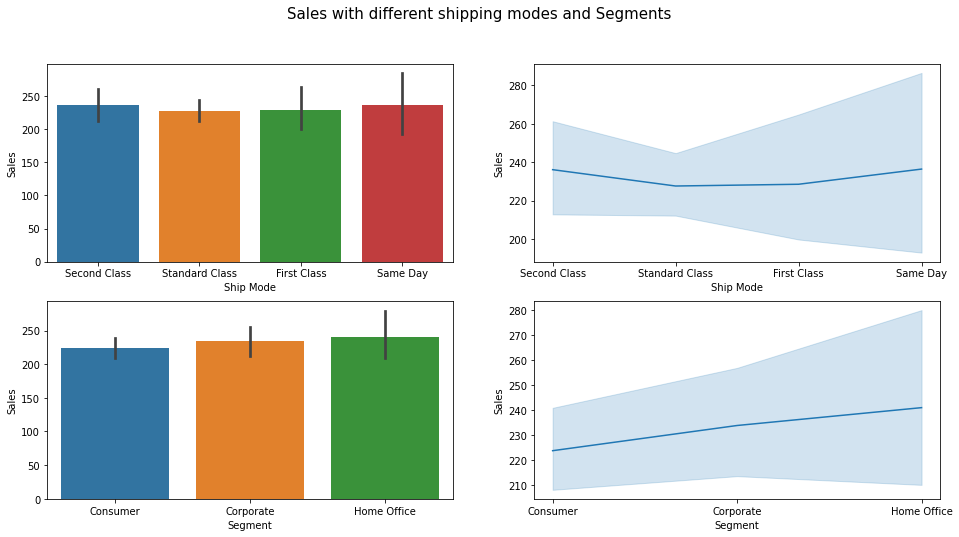

In [53]:
fig,axes=plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Sales with different shipping modes and Segments",fontsize=15)
sns.barplot(dataset['Ship Mode'],dataset['Sales'],ax=axes[0,0])
sns.lineplot(dataset['Ship Mode'],dataset['Sales'],ax=axes[0,1])
sns.barplot(dataset['Segment'],dataset['Sales'],ax=axes[1,0])
sns.lineplot(dataset['Segment'],dataset['Sales'],ax=axes[1,1])
plt.show()